In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('movie.csv')
df

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [13]:
df['label'].unique()

array([0, 1], dtype=int64)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [16]:
df.shape

(40000, 2)

In [19]:
df['label'].value_counts()

label
0    20019
1    19981
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

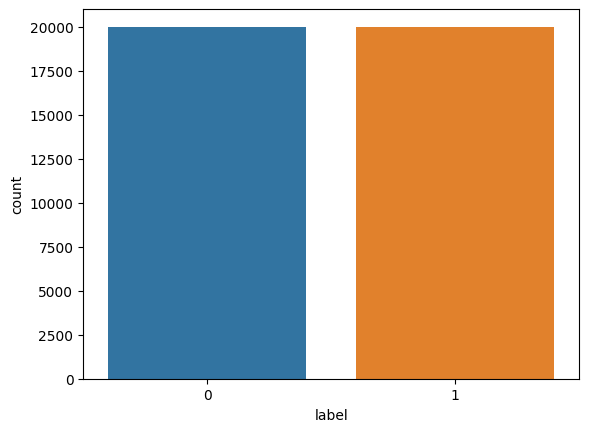

In [21]:
sns.countplot(data=df, x='label')

In [22]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [23]:
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)')

In [24]:
def preprocessing(text):
    text = re.sub('<[^>]*>', '', text)
    emojis = emoji_pattern.findall(text)
    text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', '')

    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set]

    return " ".join(text)

In [27]:
preprocessing('this is SOME TEXT   :) :D <p>hello world<p> <div> <div> </h2>')

'text hello world :) :d'

In [29]:
df['text'] = df['text'].apply(lambda x: preprocessing(x))

In [31]:
df['text']

0        grew b 1965 watch love thunderbird mate school...
1        put movi dvd player sat coke chip expect hope ...
2        peopl know particular time past like feel need...
3        even though great interest biblic movi bore de...
4        im die hard dad armi fan noth ever chang got t...
                               ...                        
39995    western union someth forgotten classic western...
39996    movi incred piec work explor everi nook cranni...
39997    wife watch movi plan visit sicili stromboli so...
39998    first watch flatlin amaz necessari featur good...
39999    would film good gross estim 95 000 000 award n...
Name: text, Length: 40000, dtype: object

In [33]:

pos_data = df[df['label'] == 1]
pos_data = pos_data['text']
neg_data = df[df['label'] == 0]
neg_data = neg_data['text']

In [34]:
pos_data

4        im die hard dad armi fan noth ever chang got t...
6        final watch shock movi last night disturb mind...
8        may remak 1987 autumn tale eleven year directo...
9        super ex girlfriend turn pleasant surpris real...
10       believ peopl look plot film laural hardi light...
                               ...                        
39992    although agre good great movi mani reason post...
39995    western union someth forgotten classic western...
39996    movi incred piec work explor everi nook cranni...
39998    first watch flatlin amaz necessari featur good...
39999    would film good gross estim 95 000 000 award n...
Name: text, Length: 19981, dtype: object

In [35]:
neg_data

0        grew b 1965 watch love thunderbird mate school...
1        put movi dvd player sat coke chip expect hope ...
2        peopl know particular time past like feel need...
3        even though great interest biblic movi bore de...
5        terribl movi everyon said made laugh cameo app...
                               ...                        
39984    relat film fail engag either intellectu emot a...
39985    comedi funni watch ugli deadbeat alcohol atten...
39993    best movi 90 welsh trainspot aye right went mo...
39994    girlfriend habit go blockbust choos movi one e...
39997    wife watch movi plan visit sicili stromboli so...
Name: text, Length: 20019, dtype: object

In [36]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=True,
                        preprocessor=None,
                        use_idf=True,
                        norm='l2',
                        smooth_idf=True)

y = df['label'].values
x = tfidf.fit_transform(df['text'])

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, scoring='accuracy', random_state=0, max_iter=1000).fit(X_train, y_train)

In [41]:
y_pred = clf.predict(X_test)

In [42]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.89
